In [6]:
%%html
<style>
body {
    font-family: "Calibri", sans-serif;
}
</style> 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('IsolationForest.csv')

In [4]:
df

,datetime,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Anomaly
0,01-10-12 13:00,58.0,1012.0,288.220000,260.0,7.0,0
1,01-10-12 14:00,57.0,1012.0,288.247676,260.0,7.0,0
2,01-10-12 15:00,57.0,1012.0,288.326940,260.0,7.0,0
3,01-10-12 16:00,57.0,1012.0,288.406203,260.0,7.0,0
4,01-10-12 17:00,57.0,1012.0,288.485467,261.0,6.0,0
...,...,...,...,...,...,...,...
43604,27-10-17 20:00,36.0,1019.0,289.980000,0.0,3.0,0
43605,27-10-17 21:00,38.0,1019.0,289.480000,0.0,1.0,0
43606,27-10-17 22:00,54.0,1019.0,287.920000,196.0,2.0,0
43607,27-10-17 23:00,62.0,1020.0,285.830000,171.0,3.0,0


In [5]:
del df['datetime']

In [6]:
df

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Anomaly
0,58.0,1012.0,288.220000,260.0,7.0,0
1,57.0,1012.0,288.247676,260.0,7.0,0
2,57.0,1012.0,288.326940,260.0,7.0,0
3,57.0,1012.0,288.406203,260.0,7.0,0
4,57.0,1012.0,288.485467,261.0,6.0,0
...,...,...,...,...,...,...
43604,36.0,1019.0,289.980000,0.0,3.0,0
43605,38.0,1019.0,289.480000,0.0,1.0,0
43606,54.0,1019.0,287.920000,196.0,2.0,0
43607,62.0,1020.0,285.830000,171.0,3.0,0


In [7]:
df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Anomaly
count,43609.000000,43609.000000,43609.000000,43609.000000,43609.000000,43609.000000
mean,66.656103,1017.038249,285.473928,196.113486,3.221950,0.100002
std,19.867463,10.141989,10.228924,107.272360,2.174724,0.300006
min,10.000000,959.000000,250.774000,0.000000,0.000000,0.000000
25%,51.000000,1012.000000,277.470000,104.000000,2.000000,0.000000
50%,68.000000,1017.000000,286.022000,220.000000,3.000000,0.000000
75%,83.000000,1023.000000,293.830000,288.000000,4.000000,0.000000
max,100.000000,1052.000000,310.240000,360.000000,25.000000,1.000000


In [13]:
Y = df['Anomaly']

In [14]:
Y = np.array(y)

In [15]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
X = df[['Humidity','Pressure','Temperature','Wind_Direction','Wind_Speed']]

In [18]:
X = np.array(X)

In [19]:
X

array([[  58.       , 1012.       ,  288.22     ,  260.       ,
           7.       ],
       [  57.       , 1012.       ,  288.2476762,  260.       ,
           7.       ],
       [  57.       , 1012.       ,  288.3269397,  260.       ,
           7.       ],
       ...,
       [  54.       , 1019.       ,  287.92     ,  196.       ,
           2.       ],
       [  62.       , 1020.       ,  285.83     ,  171.       ,
           3.       ],
       [  58.       , 1020.       ,  284.98     ,    0.       ,
           2.       ]])

In [29]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=38, shuffle = True)
import imblearn
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
X, Y = oversample.fit_resample(X_train, y_train)
Counter(Y)

Counter({1: 20189, 0: 20189})

In [30]:
X_train

array([[  61.40714428, 1036.13571476,  281.512595  ,   50.        ,
           5.        ],
       [  60.        , 1018.        ,  278.07      ,   20.        ,
           6.        ],
       [ 100.        , 1028.        ,  279.653     ,  347.        ,
           5.        ],
       ...,
       [  32.44119084, 1033.75632715,  283.31151558,  100.31513631,
           5.74789095],
       [  59.        , 1016.        ,  274.81      ,  310.        ,
           5.        ],
       [  65.37492212, 1039.57504673,  289.54471246,    0.        ,
           1.52501558]])

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [33]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(128, activation='sigmoid',bias_regularizer=l2(0.01))(input_layer)
dense_layer_2 = Dense(128, activation='sigmoid',bias_regularizer=l2(0.01))(dense_layer_1)
dense_layer_3 = Dense(128, activation='sigmoid',bias_regularizer=l2(0.01))(dense_layer_2)
output = Dense(1, activation='sigmoid')(dense_layer_3) # Can be sigmoid as well 

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=0.01)

Epoch 1/100
312/312 [==============================] - 1s 2ms/step - loss: 0.5844 - acc: 0.6918 - val_loss: 0.4978 - val_acc: 0.7500
Epoch 2/100
312/312 [==============================] - 0s 1ms/step - loss: 0.5250 - acc: 0.7386 - val_loss: 0.4782 - val_acc: 0.7574
Epoch 3/100
312/312 [==============================] - 0s 1ms/step - loss: 0.4008 - acc: 0.8216 - val_loss: 0.3236 - val_acc: 0.8861
Epoch 4/100
312/312 [==============================] - 0s 1ms/step - loss: 0.3336 - acc: 0.8621 - val_loss: 0.3237 - val_acc: 0.8688
Epoch 5/100
312/312 [==============================] - 0s 1ms/step - loss: 0.3296 - acc: 0.8640 - val_loss: 0.3037 - val_acc: 0.8861
Epoch 6/100
312/312 [==============================] - 0s 1ms/step - loss: 0.3262 - acc: 0.8650 - val_loss: 0.2967 - val_acc: 0.8886
Epoch 7/100
312/312 [==============================] - 0s 1ms/step - loss: 0.3214 - acc: 0.8670 - val_loss: 0.2905 - val_acc: 0.8911
Epoch 8/100
312/312 [==============================] - 0s 1ms/step - 

In [36]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100 ,' %')

316/316 [==============================] - 0s 606us/step - loss: 0.0744 - acc: 0.9729
Test Score: 0.07435251772403717
Test Accuracy: 97.29193449020386  %


In [37]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(type(y_pred))
print(type(y_test))
print(classification_report(y_test, y_pred.round()))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5068
           1       0.96      0.98      0.97      5013

    accuracy                           0.97     10081
   macro avg       0.97      0.97      0.97     10081
weighted avg       0.97      0.97      0.97     10081



In [38]:
train_score=model.evaluate(X_train,y_train,verbose=1)
print('Train accuracy:' , train_score[1]*100 , '%')

1261/1261 [==============================] - 1s 495us/step - loss: 0.0629 - acc: 0.9759
Train accuracy: 97.58946299552917 %


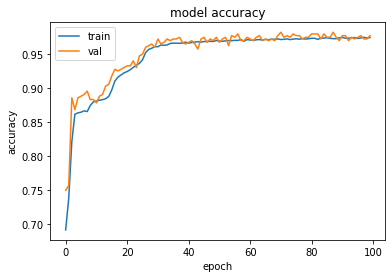

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

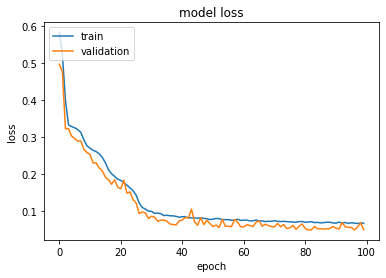

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
model.save('Anomaly_Detection_model.h5')

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred.round())

array([[4884,  184],
       [  89, 4924]])

In [43]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

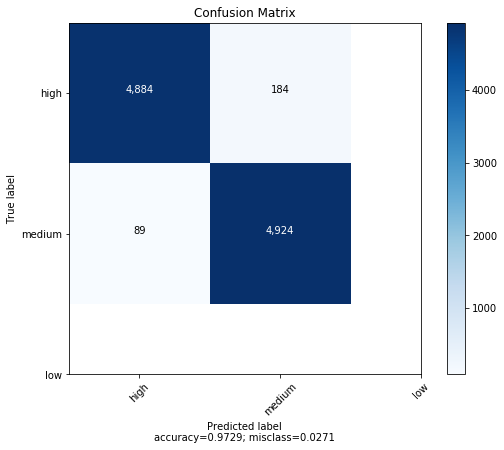

In [44]:
plot_confusion_matrix(cm           = np.array([[4884, 184],[89, 4924]]), 
                      normalize    = False,
                      target_names = ['high', 'medium', 'low'],
                      title        = "Confusion Matrix")

In [45]:
print((y_pred.round()))
print(y_test)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
[1 1 1 ... 0 1 0]


In [46]:
df2=pd.DataFrame({'Predicted':list(y_pred.round()),'Original':list(y_test)})

In [47]:
df2

,Predicted,Original
0,[1.0],1
1,[1.0],1
2,[1.0],1
3,[0.0],0
4,[1.0],1
...,...,...
10076,[0.0],0
10077,[0.0],0
10078,[0.0],0
10079,[1.0],1


In [48]:
df2.to_csv('output.csv')

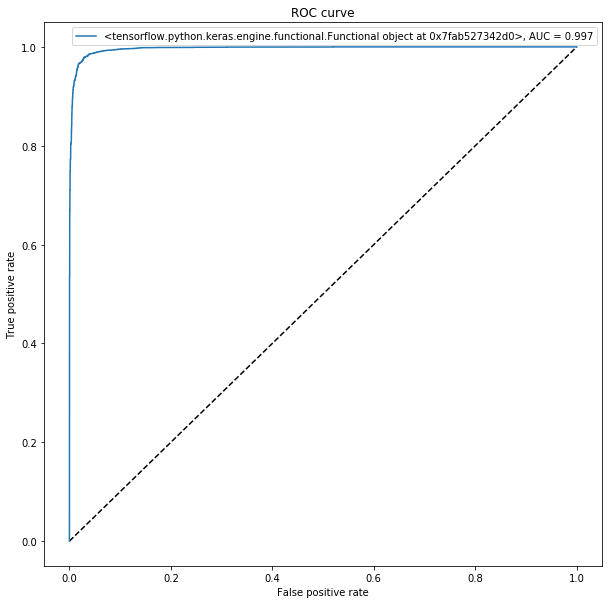

In [49]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')


    
Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [50]:
from keras.models import load_model

In [51]:
model=load_model('Anomaly_Detection_model.h5')

def anomaly_predictor(humidity,pressure,temperature,wind_direction,wind_speed):
  list_of_features=[[humidity,pressure,temperature,wind_direction,wind_speed]]
  features_array=np.array(list_of_features)
  sc = StandardScaler()
  SS_features_array=sc.fit_transform(features_array)
  predicted_output=model.predict(SS_features_array)
  print(predicted_output)
  if round(int(predicted_output),1) == 0:
    return 'Normal'
  else:
    return 'Anomaly'

In [52]:
anomaly_predictor(58,1012,288.22,260,7)

[[1.0623948e-08]]


'Normal'

In [53]:
anomaly_predictor(0,900,0,100,1)

[[1.0623948e-08]]


'Normal'

In [55]:
anomaly_predictor(57,1012,285.23,260,8)

[[1.0623948e-08]]


'Normal'

In [56]:
anomaly_predictor(0,0,0,0,0)

[[1.0623948e-08]]


'Normal'